In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
%matplotlib inline
sns.set()

# Importing Dataset and Concat

In [2]:
#importing data
df_train=pd.read_csv(r'D:\Titanic Dataset\train.csv')
df_test=pd.read_csv(r'D:\Titanic Dataset\test.csv')

In [3]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Check the correlation between variables in train set
 * Survival **strongly** correaltes to **Fare and Pclass**
 * Survival also correlates to **Age and Parch**

In [4]:
df_train.corr().style.background_gradient()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1,-0.00500666,-0.035144,0.0368472,-0.0575268,-0.00165201,0.0126582
Survived,-0.00500666,1,-0.338481,-0.0772211,-0.0353225,0.0816294,0.257307
Pclass,-0.035144,-0.338481,1,-0.369226,0.0830814,0.0184427,-0.5495
Age,0.0368472,-0.0772211,-0.369226,1,-0.308247,-0.189119,0.0960667
SibSp,-0.0575268,-0.0353225,0.0830814,-0.308247,1,0.414838,0.159651
Parch,-0.00165201,0.0816294,0.0184427,-0.189119,0.414838,1,0.216225
Fare,0.0126582,0.257307,-0.5495,0.0960667,0.159651,0.216225,1


### Exploratory Data Analysis based on correlations
 - Female overall survived rate are much higher than male (even compare 3rd class femle with 1st class male)
 - Under the same gender,1st class have much higher survived rate than other classes
 - ?Generate an idea if it's possible to add new feature to categorize them into four groups: **1st_male**,**other_male**,**3rd_female**,**other_female**

C:\Users\wangchu\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


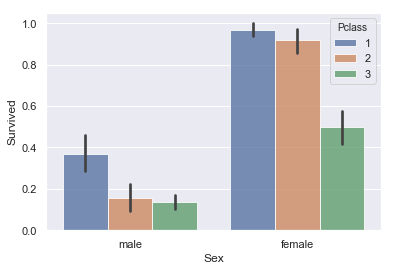

In [5]:
sns.barplot(x='Sex',y='Survived',hue='Pclass',data=df_train,alpha=0.8)

C:\Users\wangchu\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


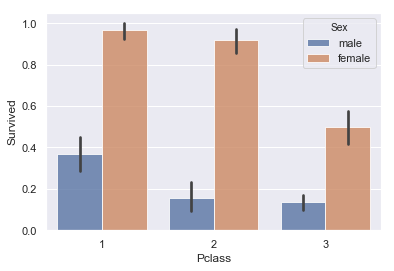

In [6]:
sns.barplot(x='Pclass',y='Survived',hue='Sex',data=df_train,alpha=0.8)

In [7]:
survived_df_train=df_train['Survived'].values

In [8]:
df_train_=df_train.drop(columns=['Survived'])

In [9]:
#concat two tables
data=pd.concat(objs=[df_train_,df_test])

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Name           1309 non-null object
Sex            1309 non-null object
Age            1046 non-null float64
SibSp          1309 non-null int64
Parch          1309 non-null int64
Ticket         1309 non-null object
Fare           1308 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 122.7+ KB


### Missing Values
 - Age:1046 out of 1309
 - Fare: 1308 out of 1309
 - Cabin: 295 out of 1309
 - Embarked: 1307 out of 1309

### Re-check correlations between variables in concat set
 * Age is negatively related to Pclass
 * Fare is strong positively related to Parch
 * Parch adn SibSp have a high positve correlation

In [11]:
#View the correlation between variables
data.corr().style.background_gradient()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
PassengerId,1,-0.0383544,0.0288145,-0.055224,0.00894208,0.0314285
Pclass,-0.0383544,1,-0.408106,0.060832,0.0183222,-0.558629
Age,0.0288145,-0.408106,1,-0.243699,-0.150917,0.17874
SibSp,-0.055224,0.060832,-0.243699,1,0.373587,0.160238
Parch,0.00894208,0.0183222,-0.150917,0.373587,1,0.221539
Fare,0.0314285,-0.558629,0.17874,0.160238,0.221539,1


# Handling Missing Value

### 1.Age
* Missing Age value can be imputed by Medain Age of each Pclass,elderly might be rich and bought higher class
* Also,adding sex to this group may reflect more detailed information and give more accurate prediction 

In [12]:
#group data by Pclass and Sex,view the median of each group
data.groupby(['Pclass','Sex'])['Age'].median()

Pclass  Sex   
1       female    36.0
        male      42.0
2       female    28.0
        male      29.5
3       female    22.0
        male      25.0
Name: Age, dtype: float64

#### 1.1Filling the missing Age values
- First filling the NaN with 0
- Second using for loop to iterate each sample and transform 0 to the target median age above
- Warning: NaN should be filled with other distinctable things and process it!!

In [13]:
data['Age']=data['Age'].fillna(0)
filled_Age=[]
for i,k,g in zip(data['Pclass'],data['Sex'],data['Age']):
    if g!=0:
        filled_Age.append(g)
    elif i==1 and k=='female':
        filled_Age.append(36)
    elif i==1 and k=='male':
        filled_Age.append(42)
    elif i==2 and k=='female':
        filled_Age.append(28)
    elif i==2 and k=='male':
        filled_Age.append(29.5)
    elif i==3 and k=='female':
        filled_Age.append(22)
    else:
        filled_Age.append(25)

In [14]:
len(filled_Age)

1309

In [15]:
data['Age']=filled_Age

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Name           1309 non-null object
Sex            1309 non-null object
Age            1309 non-null float64
SibSp          1309 non-null int64
Parch          1309 non-null int64
Ticket         1309 non-null object
Fare           1308 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 122.7+ KB


### 2.Embarked
 - These two women have the same Ticket Number and in the same Cabin
 - They are on board together

In [17]:
data[data['Embarked'].isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [18]:
data['Embarked']=data['Embarked'].fillna('S')

### 3.Fare
 - We can impute the median Fare of Pclass3 male

In [19]:
data[data['Fare'].isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [20]:
data.groupby(['Pclass','Sex'])['Fare'].median()

Pclass  Sex   
1       female    80.92915
        male      49.50420
2       female    23.00000
        male      13.00000
3       female    10.48960
        male       7.89580
Name: Fare, dtype: float64

In [21]:
data['Fare']=data['Fare'].fillna(7.9)

### 4.Cabin
 - Impute missing value as 'M'
 - Extract the Capital letter of each Cabin number
 - Add new column named 'Cabin_level' both for df_train and data
 - Compute the survived rate of df_train
 - Add new column named 'Cabin_bySurvived' according to the survived rate

In [22]:
data['Cabin']=data['Cabin'].fillna('M')

In [23]:
cabin_level=[]
for i in data['Cabin']:
    cabin_level.append(i[:1])

In [24]:
len(cabin_level)

1309

In [25]:
data['Cabin_level']=cabin_level

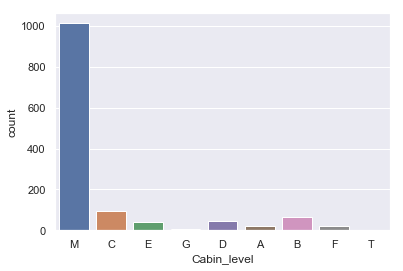

In [26]:
sns.countplot(x='Cabin_level',data=data)

In [27]:
#add new column 'Cabin_level' to df_train
df_train['Cabin']=df_train['Cabin'].fillna('M')
cabin_level_df_train=[]
for i in df_train['Cabin']:
    cabin_level_df_train.append(i[:1])
    
df_train['Cabin_level']=cabin_level_df_train

In [28]:
#View survived number groupby canbin_level 
df_train.groupby('Cabin_level')['Survived'].value_counts()

Cabin_level  Survived
A            0             8
             1             7
B            1            35
             0            12
C            1            35
             0            24
D            1            25
             0             8
E            1            24
             0             8
F            1             8
             0             5
G            0             2
             1             2
M            0           481
             1           206
T            0             1
Name: Survived, dtype: int64

In [29]:
#Calculate survived rate for different cabin_level
list_cabin=['A','B','C','D','E','F','G','M','T']
for i in list_cabin:
    d=df_train[df_train['Cabin_level']==i]
    survived_rate=np.round(len(d[d['Survived']==1])/len(d),2)
    print('{} cabin survived rate is'.format(i),survived_rate)

A cabin survived rate is 0.47
B cabin survived rate is 0.74
C cabin survived rate is 0.59
D cabin survived rate is 0.76
E cabin survived rate is 0.75
F cabin survived rate is 0.62
G cabin survived rate is 0.5
M cabin survived rate is 0.3
T cabin survived rate is 0.0


In [30]:
#Add new columns 'Cabin_bySurvived': indicating the survived possibility according to their cabin
data['Cabin_bySurvived']=data['Cabin_level'].replace({'A':'Medium','B':'High','C':'Medium',
                                                      'D':'High','E':'High','F':'Medium','G':'Medium','M':'Low','T':'Low'})

In [31]:
data.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_level,Cabin_bySurvived
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,M,S,M,Low
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,C,Medium
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,M,S,M,Low


In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 13 columns):
PassengerId         1309 non-null int64
Pclass              1309 non-null int64
Name                1309 non-null object
Sex                 1309 non-null object
Age                 1309 non-null float64
SibSp               1309 non-null int64
Parch               1309 non-null int64
Ticket              1309 non-null object
Fare                1309 non-null float64
Cabin               1309 non-null object
Embarked            1309 non-null object
Cabin_level         1309 non-null object
Cabin_bySurvived    1309 non-null object
dtypes: float64(2), int64(4), object(7)
memory usage: 183.2+ KB


# Feature Engineering

### 1.Name
 - Extract titles from names
 - Group titles together

In [33]:
titles=[]
for i in data['Name']:
    L=i.split(', ')[-1]
    s=L.split('.')[0]
    titles.append(s)

In [34]:
len(titles)

1309

In [35]:
data['titles']=titles
data['titles']=data['titles'].replace({'Miss':'Mrs/Ms/Miss','Mrs':'Mrs/Ms/Miss','Ms':'Mrs/Ms/Miss','Mlle':'Mrs/Ms/Miss'
                                       ,'Lady':'Mrs/Ms/Miss','Mme':'Mrs/Ms/Miss','the Countess':'Mrs/Ms/Miss','Dona':'Mrs/Ms/Miss'
                                      ,'Dr':'Dr/Military/Noble/Clergy','Col':'Dr/Military/Noble/Clergy','Major':'Dr/Military/Noble/Clergy'
                                      ,'Jonkheer':'Dr/Military/Noble/Clergy','Capt':'Dr/Military/Noble/Clergy','Sir':'Dr/Military/Noble/Clergy'
                                      ,'Don':'Dr/Military/Noble/Clergy','Rev':'Dr/Military/Noble/Clergy'})


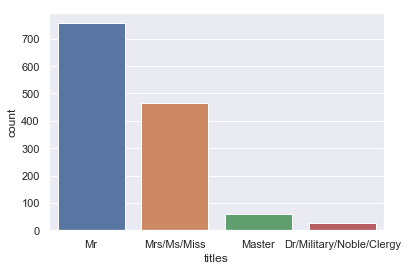

In [36]:
sns.countplot(x='titles',data=data)

### 2.Fare and Age Binning

In [37]:
data['bin_Age']=pd.qcut(data['Age'],q=10,labels=False)
data['bin_Fare']=pd.qcut(data['Fare'],q=10,labels=False)

In [38]:
data.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_level,Cabin_bySurvived,titles,bin_Age,bin_Fare
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,M,S,M,Low,Mr,2,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,C,Medium,Mrs/Ms/Miss,7,8
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,M,S,M,Low,Mrs/Ms/Miss,4,2


### 3.Sex-Class Group

In [39]:
Sex_class_group=[]
for i,g in zip(data['Pclass'],data['Sex']):
    if i==1 and g=='male':
        Sex_class_group.append('1st_male')
    elif i==2 and g=='male':
        Sex_class_group.append('other_male')
    elif i==3 and g=='male':
        Sex_class_group.append('other_male')
    elif i==1 and g=='female':
        Sex_class_group.append('other_female')
    elif i==2 and g=='female':
        Sex_class_group.append('other_female')
    else:
        Sex_class_group.append('3rd_female')
    

In [40]:
data['Sex_class_group']=Sex_class_group

### 3.Family Size

In [41]:
data['Family_size']=data['SibSp']+data['Parch']

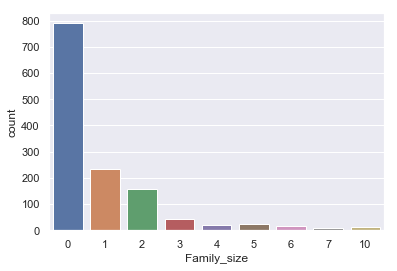

In [42]:
sns.countplot(x='Family_size',data=data)

In [43]:
df_train['Family_size']=df_train['SibSp']+df_train['Parch']

In [44]:
df_train.groupby('Family_size')['Survived'].value_counts()

Family_size  Survived
0            0           374
             1           163
1            1            89
             0            72
2            1            59
             0            43
3            1            21
             0             8
4            0            12
             1             3
5            0            19
             1             3
6            0             8
             1             4
7            0             6
10           0             7
Name: Survived, dtype: int64

In [45]:
list_family=[0,1,2,3,4,5,6,7,10]
for i in list_family:
    d=df_train[df_train['Family_size']==i]
    survived_rate=np.round(len(d[d['Survived']==1])/len(d),2)
    print('{}-people family survived rate is'.format(i),survived_rate)

0-people family survived rate is 0.3
1-people family survived rate is 0.55
2-people family survived rate is 0.58
3-people family survived rate is 0.72
4-people family survived rate is 0.2
5-people family survived rate is 0.14
6-people family survived rate is 0.33
7-people family survived rate is 0.0
10-people family survived rate is 0.0


In [46]:
data['Survived_p_byFamily']=data['Family_size'].replace({0:'Low',1:'High',2:'High',3:'High',4:'Low',5:'Low',6:'Low',7:'Low',10:'Low'})

# Feature Selection for Building First Model

In [47]:
data.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked', 'Cabin_level',
       'Cabin_bySurvived', 'titles', 'bin_Age', 'bin_Fare', 'Sex_class_group',
       'Family_size', 'Survived_p_byFamily'],
      dtype='object')

In [48]:
data1=data[['Pclass','Sex','SibSp',
        'Cabin_level', 
        'titles', 'bin_Age', 'bin_Fare', 'Family_size',
       'Sex_class_group', 'Survived_p_byFamily']]

In [49]:
data1.head(2)

,Pclass,Sex,SibSp,Cabin_level,titles,bin_Age,bin_Fare,Family_size,Sex_class_group,Survived_p_byFamily
0,3,male,1,M,Mr,2,0,1,other_male,High
1,1,female,1,C,Mrs/Ms/Miss,7,8,1,other_female,High


In [50]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 10 columns):
Pclass                 1309 non-null int64
Sex                    1309 non-null object
SibSp                  1309 non-null int64
Cabin_level            1309 non-null object
titles                 1309 non-null object
bin_Age                1309 non-null int64
bin_Fare               1309 non-null int64
Family_size            1309 non-null int64
Sex_class_group        1309 non-null object
Survived_p_byFamily    1309 non-null object
dtypes: int64(5), object(5)
memory usage: 152.5+ KB


In [51]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in data1.columns:
    if data1[i].dtypes=='object':
        data1[i]=le.fit_transform(data1[i])
    else:
        data1[i]=data1[i]

C:\Users\wangchu\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\wangchu\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [52]:
data1.head(3)

,Pclass,Sex,SibSp,Cabin_level,titles,bin_Age,bin_Fare,Family_size,Sex_class_group,Survived_p_byFamily
0,3,1,1,7,2,2,0,1,3,0
1,1,0,1,2,3,7,8,1,2,0
2,3,0,0,7,3,4,2,0,1,1


In [53]:
train_data=data1[:891]
test_data=data1[891:]
X=train_data.values
test=test_data.values
y=survived_df_train

# Training the First Model

In [90]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
rf=RandomForestClassifier(random_state=1,oob_score=True)

In [92]:
param_rf={'max_depth':list(range(3,10,1)),'max_features':['log2','sqrt'],'n_estimators':list(range(20,1000,2)),
          'min_samples_leaf':list(range(1,10)),'min_samples_split':list(range(2,10))}
rf_cv=RandomizedSearchCV(rf,param_distributions=param_rf,cv=10,scoring='accuracy')
rf_cv.fit(X,y)
print('Tuned RandomForest Parameters:',rf_cv.best_params_)
print('Training set Best score is:',rf_cv.best_score_)
print('out of bag score:',rf_cv.best_estimator_.oob_score_)

Tuned RandomForest Parameters: {'n_estimators': 180, 'min_samples_split': 8, 'min_samples_leaf': 5, 'max_features': 'log2', 'max_depth': 6}
Training set Best score is: 0.8282828282828283
out of bag score: 0.8260381593714927


- Apprantly this model is not performing well than those tuned below

## -----------------------------------------------------------------------------------------------------------
### Model Tuning Iteration
#### 1.First, we only tune the n_estimators
- Select a range and iterate to find the optimal n_estimators

0.8070247418000227 152


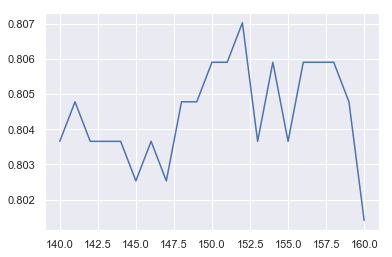

In [68]:
#Model Tuning n_estimators
scores=[]
for i in range(140,161):
    rf1=RandomForestClassifier(random_state=1,n_estimators=i)
    score=cross_val_score(rf1,X,y,cv=10).mean()
    scores.append(score)
print(max(scores),scores.index(max(scores))+140)
plt.plot(range(140,161),scores)
plt.show()

##### After three rounds iteration n_estimators=152,model performace is the best 0.807

#### 2.Second,we use the best n_estimators and tune max_depth
- select a range(1,10) and do GridSearchCV to find the optimal params
- Also,check out the 'out of bag' score, which signifies the model perfomace on unseen data(out of bag when bootstraping)

In [88]:
#Tuning max_depth
from sklearn.model_selection import GridSearchCV
grid_params_1={'max_depth':range(1,11)}
rf2=RandomForestClassifier(n_estimators=152,random_state=1,oob_score=True)
grid_rf2=GridSearchCV(rf2,grid_params_1,cv=10)
grid_rf2.fit(X,y)
print('Best Params:',grid_rf2.best_params_)
print('Best Score:',grid_rf2.best_score_)
print('out of bag score:',grid_rf2.best_estimator_.oob_score_)

Best Params: {'max_depth': 4}
Best Score: 0.8294051627384961
out of bag score: 0.8282828282828283


- oob_score is approximately equal to cv score, not overfit

#### 3.Third, we need to tune min_samples_leaf
- We can graph it and visualy see the changes

0.8305078878674385 3


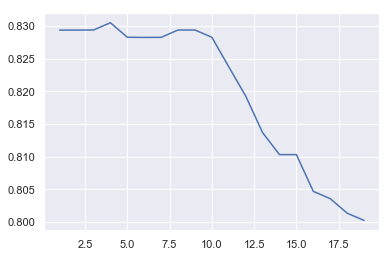

In [81]:
#Tuning min_samples_leaf
scores_2=[]
for i in range(1,20):
    rf3=RandomForestClassifier(n_estimators=152,max_depth=4,min_samples_leaf=i,random_state=1,oob_score=True)
    score2=cross_val_score(rf3,X,y,cv=10).mean()
    scores_2.append(score2)
print(max(scores_2),scores_2.index(max(scores_2)))
plt.plot(range(1,20),scores_2)
plt.show()

In [87]:
grid_params_2={'min_samples_leaf':list(range(1,6))}
rf3=RandomForestClassifier(n_estimators=152,max_depth=4,random_state=1,oob_score=True)
grid_rf3=GridSearchCV(rf3,grid_params_2,cv=10)
grid_rf3.fit(X,y)
print('Best Params:',grid_rf3.best_params_)
print('Best Score:',grid_rf3.best_score_)
print('out of bag score:',grid_rf3.best_estimator_.oob_score_)

Best Params: {'min_samples_leaf': 4}
Best Score: 0.8305274971941639
out of bag score: 0.8271604938271605


In [99]:
rf3_model=RandomForestClassifier(n_estimators=152,max_depth=4,random_state=1,oob_score=True,min_samples_leaf=5)
rf3_model.fit(X,y)
print('cross validation score:',cross_val_score(rf3_model,X,y,cv=10).mean())
print('out of bag score:',rf3_model.oob_score_)

cross validation score: 0.8282856656452161
out of bag score: 0.8271604938271605


- min_samples_leaf=4 is a little bit overfitting
- min_samples_leaf=5 is better than 4
- Tuned min_samples_split=5 accuracy=0.78468

#### 4.Forth, we need to tune min_samples_split

In [120]:
# Tuning min_samples_split
grid_params_3={'min_samples_split':list(range(2,10))}
rf4=RandomForestClassifier(n_estimators=152,max_depth=4,random_state=1,oob_score=True)
grid_rf4=GridSearchCV(rf4,grid_params_3,cv=10)
grid_rf4.fit(X,y)
print('Best Params:',grid_rf4.best_params_)
print('Best Score:',grid_rf4.best_score_)
print('out of bag score:',grid_rf4.best_estimator_.oob_score_)

Best Params: {'min_samples_split': 8}
Best Score: 0.8316498316498316
out of bag score: 0.8271604938271605


- Adding min_samples_split will decrease the training score and return params=2, no change in oob_score,thus meaning model need to be more complex
- Tuned min_samples_split=8, accuracy=0.78468

#### 5.Fifth, we neee to tune max_features

0.8316189989785496 3


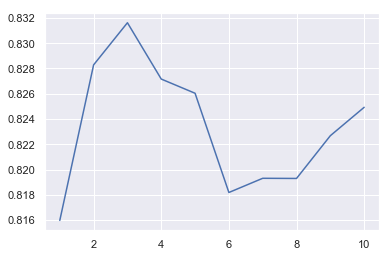

In [123]:
# Tuning max_features
scores=[]
for i in range(1,11):
    rf5=RandomForestClassifier(n_estimators=152,max_depth=4,min_samples_split=8,random_state=1,max_features=i,oob_score=True)
    score=cross_val_score(rf5,X,y,cv=10).mean()
    scores.append(score)
print(max(scores),scores.index(max(scores))+1)
plt.plot(range(1,11),scores)
plt.show()

In [125]:
rf5_model=RandomForestClassifier(n_estimators=152,max_depth=4,min_samples_split=8,random_state=1,max_features=3,oob_score=True)
rf5_model.fit(X,y)
print('Best score:',cross_val_score(rf5_model,X,y,cv=10).mean())
print('out of bag score:',rf5_model.oob_score_)

Best score: 0.8316189989785496
out of bag score: 0.8271604938271605


# Evaluating Feature Importances

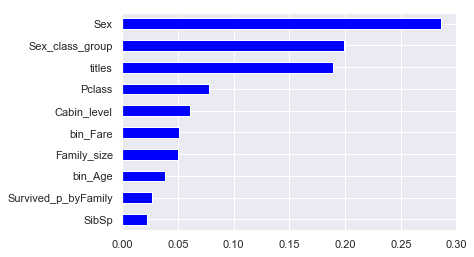

In [115]:
model_rf=grid_rf4.best_estimator_
importances_rf=pd.Series(model_rf.feature_importances_,index=train_data.columns)
sorted_im=importances_rf.sort_values()
sorted_im.plot(kind='barh',color='blue')
plt.show()

In [116]:
from sklearn.model_selection import learning_curve

In [117]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()
 
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")
 
    plt.legend(loc="best")
    return plt

<module 'matplotlib.pyplot' from 'C:\\Users\\wangchu\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

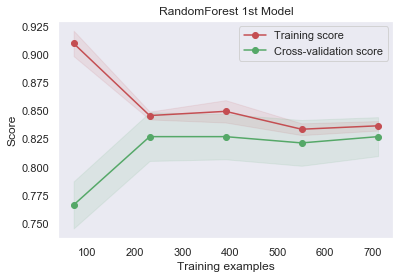

In [118]:
plot_learning_curve(model_rf, 'RandomForest 1st Model', X, y, ylim=None, cv=5,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5))

In [104]:
y_pred=grid_rf2.best_estimator_.predict(test)
df_test['Survived']=y_pred
df_test[['PassengerId','Survived']].to_csv(r'D:\Titanic Dataset\Finalllll.csv',index=False)